If J0030+0451 has a central density of:
1000000000000000.0 g cm^-3
It has a mass of:
460.13870972286355 Solar Masses
If J0030+0451 has a central density of:
1e+16 g cm^-3
It has a mass of:
4601.387097228602 Solar Masses
If J0030+0451 has a central density of:
1e+17 g cm^-3
It has a mass of:
46013.87097228614 Solar Masses


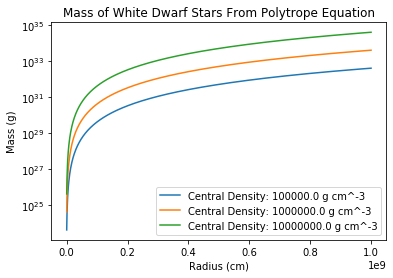

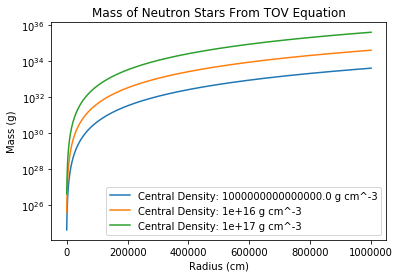

In [47]:
'''
ASTP-720, Fall 2020
Homework 4
Zach Diermyer
Problems 1, 2 & 3
'''

import numpy as np
import matplotlib.pyplot as plt

def rungekutta(func, RRange, y0, rhoc, h):
    '''
    Uses the Runge-Kutta method to approximate the input function's variables
    (can handle up to 2 variables)
    Inputs:
        func - Function being approximated
        RRange - Tuple of starting and ending radius of approximation
        y0 - Initial values of function at starting time
        h - Step size
    Returns:
        ApproxMass - Array of approximated mass values
        ApproxPress - Array of approximated pressure values
    '''
    ApproxMass = []
    ApproxPress = []
    r = RRange[0]
    r1 = RRange[1]
    while r <= r1:
        if r == RRange[0]:
            k1 = h*func(y0, r, rhoc)[0]
            k2 = h*func((y0[0]+(k1/2), y0[1]+(k1/2)), r+(h/2), rhoc)[0]
            k3 = h*func((y0[0]+(k2/2), y0[1]+(k2/2)), r+(h/2), rhoc)[0]
            k4 = h*func((y0[0]+k3, y0[1]+k3), r+h, rhoc)[0]
            yi1 = y0[0] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            dk1 = h*func(y0, r, rhoc)[1]
            dk2 = h*func((y0[0]+(k1/2), y0[1]+(k1/2)), r+(h/2), rhoc)[1]
            dk3 = h*func((y0[0]+(k2/2), y0[1]+(k2/2)), r+(h/2), rhoc)[1]
            dk4 = h*func((y0[0]+k3, y0[1]+k3), r+h, rhoc)[1]
            dyi1 = y0[1] + (1/6)*(dk1 + 2*dk2 + 2*dk3 + dk4)
        else:
            rho = ((3/4)*yi[0])/(np.pi*r**3)
            k1 = h*func(yi, r, rho)[0]
            k2 = h*func((yi[0]+(k1/2), yi[1]+(k1/2)), r+(h/2), rho)[0]
            k3 = h*func((yi[0]+(k2/2), yi[1]+(k2/2)), r+(h/2), rho)[0]
            k4 = h*func((yi[0]+k3, yi[1]+k3), r+h, rho)[0]
            yi1 = yi[0] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            dk1 = h*func(yi, r, rho)[1]
            dk2 = h*func((yi[0]+(k1/2), yi[1]+(k1/2)), r+(h/2), rho)[1]
            dk3 = h*func((yi[0]+(k2/2), yi[1]+(k2/2)), r+(h/2), rho)[1]
            dk4 = h*func((yi[0]+k3, yi[1]+k3), r+h, rho)[1]
            dyi1 = yi[1] + (1/6)*(dk1 + 2*dk2 + 2*dk3 + dk4)
        ApproxMass.append(yi1)
        ApproxPress.append(dyi1)
        r += h
        yi = (yi1, dyi1)
    return(ApproxMass, ApproxPress)

def hydrostatic(y, r, rho):
    '''
    Equations of hydrostatic equilibrium for mas and pressure rate of change
    Inputs:
        y - Tuple of starting mass and pressure values
        r - Radius used for calculation
        rho - Density used for calculation
    Returns:
        dydr - Array of mass and pressure values calculated from hydrostatic equilibrium equations
    '''
    M, P = y
    G = 6.67e-12    #cm^3 g^-1 s^-2
    dMdr = 4*np.pi*(r**2)*rho
    dPdr = -(G*M*rho)/(r**2)
    dydr = [dMdr, dPdr]
    return(dydr)

def releq(y, r, rho):
    '''
    Equation for mass and TOV Equation for pressure of neutron stars
    Inputs:
        y - Tuple of starting mass and pressure values
        r - Radius used for calculation
        rho - Density used for calculation
    Returns:
        dydr - Array of mass and pressure values calculated from mass and TOV equations
    '''
    M, P = y
    G = 6.67e-12   #cm^3 g^-1 s^-2
    c = 3*10e10    #cm s^-1
    dMdr = 4*np.pi*(r**2)*rho
    dPdr = -(G*M/(r**2)) * rho * (1+(P/(rho*(c**2)))) * (1+(4*np.pi*(r**3)/(M*(c**2)))) * (1-(2*G*M/(r*(c**2))))**-1
    dydr = [dMdr, dPdr]
    return(dydr)

def main():
    rhocwd = [10e4, 10e5, 10e6]   #g/cm^3
    rhocns = [10e14, 10e15, 10e16]   #g/cm^3
    plt.figure(1)
    labels = []
    for i in range(len(rhocwd)):
        Pc = (10e13)*(rhocwd[i]/2)**(5/3)
        MP = rungekutta(func = hydrostatic, RRange = (1, 10e8), y0 = (1e-4, Pc), rhoc = rhocwd[i], h = 10e5)
        rad = np.linspace(0,10e8,1000)
        labels.append('Central Density: ' + str(rhocwd[i]) + ' g cm^-3')
        plt.plot(rad, MP[0])
    plt.yscale('log')
    plt.xlabel('Radius (cm)')
    plt.ylabel('Mass (g)')
    plt.title('Mass of White Dwarf Stars From Polytrope Equation')
    plt.legend(labels = labels)
    plt.figure(2)
    labels = []
    for i in range(len(rhocns)):
        Pc = (5.4*10e9)*(rhocns[i]**(5/3))
        MP = rungekutta(func = releq, RRange = (1, 10e5), y0 = (1e-4, Pc), rhoc = rhocns[i], h = 1000)
        rad = np.linspace(0,10e5,1000)
        labels.append('Central Density: ' + str(rhocns[i]) + ' g cm^-3')
        plt.plot(rad, MP[0])
    plt.yscale('log')
    plt.xlabel('Radius (cm)')
    plt.ylabel('Mass (g)')
    plt.title('Mass of Neutron Stars From TOV Equation')
    plt.legend(labels = labels)
    for i in range(len(rhocns)):
        Pc = (5.4*10e9)*(rhocns[i]**(5/3))
        MP = rungekutta(func = releq, RRange = (1, 13*10e5), y0 = (1e-4, Pc), rhoc = rhocns[i], h = 1000)
        print('If J0030+0451 has a central density of:')
        print(str(rhocns[i]) + ' g cm^-3')
        print('It has a mass of:')
        print(str(MP[0][-1]/(2*10e33)) + ' Solar Masses')
        
main()